In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import AlphaSelection
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor


In [66]:
#ccdefault=pd.read_csv('../data//UCI_Credit_Card.csv')
#Ryan running on local comp:
ccdefault=pd.read_csv('UCI_Credit_Card.csv')
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)
num_cv_iterations = 5

In [67]:
ccdefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null float64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null float64
BILL_AMT2    30000 non-null float64
BILL_AMT3    30000 non-null float64
BILL_AMT4    30000 non-null float64
BILL_AMT5    30000 non-null float64
BILL_AMT6    30000 non-null float64
PAY_AMT1     30000 non-null float64
PAY_AMT2     30000 non-null float64
PAY_AMT3     30000 non-null float64
PAY_AMT4     30000 non-null float64
PAY_AMT5     30000 non-null float64
PAY_AMT6     30000 non-null float64
DEFAULT      30000 non-null int64
dtypes: float64

#### Preparing Data for Classification. 
Using DEFAULT as response variable for classification

In [68]:
cc = ccdefault.copy() # taking a copy in memory
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    del cc['DEFAULT']
    del cc['ID']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


#### Preparing Data for Regression. 
Using PAY_AMT1 as response variable for regression

In [69]:
mcc = ccdefault.copy()
# Y Response variable dataframe
y_reg = mcc['PAY_AMT1'].values
# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['PAY_AMT1'],axis=1)
# Create inci_X Explanatory Variables DF to support the individual models
mcc_X = mcredit
del mcc_X['DEFAULT']
del mcc_X['ID']
del mcc_X['BILL_AMT1']
del mcc_X['BILL_AMT2']
del mcc_X['BILL_AMT3']
del mcc_X['BILL_AMT4']
del mcc_X['BILL_AMT5']
del mcc_X['BILL_AMT6']

X_reg = mcc_X.values
num_instances = len(y_reg)
cv_object_reg = ShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object_reg.get_n_splits(X_reg, y_reg)
print(cv_object_reg)
for train_index, test_index in cv_object_reg.split(X_reg, y_reg):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
    y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]

ShuffleSplit(n_splits=5, random_state=11, test_size=0.2, train_size=0.8)
TRAIN: [10574  1826 26458 ... 21584  3775 10137] TEST: [16131 22502  9281 ...  2302 20117  5325]
TRAIN: [14312  5621  9756 ... 14795  1761 10411] TEST: [23990 12026 18018 ... 18504  3826 22997]
TRAIN: [24613 18862  7514 ...  9825 21800  7223] TEST: [25751  1408  2329 ... 13731  9430 17834]
TRAIN: [ 5199 22129  7059 ... 26445 16174 28119] TEST: [ 1736 20903   973 ... 24406 27021 16104]
TRAIN: [11485 26551  2766 ...  9370 20203 25639] TEST: [18873  8061  1602 ... 17926 20760   999]


In [70]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

## Modeling and Evaluation 3 

We planned to use 3 models for our classification. Random forest , Decision tree and KNN. 

### Classification Models 


#### Random Forest model 

Random forest is an ensempble technique that uses set of decision trees to handle classification problem. It uses random vectors to choose features based on which it creates decision trees. These features are choosen basedon some fixed distribution. Classification is done with each of these decision trees and then a majority vote is taken to decide final class. 
Following images gives an overview  of Random forest. 

In [71]:
Image(url ='../images/random_forest_tan.png')

Random forest classifiers use multiple estimators and each each estimator runs of different set of features based on random selection of features and attributes.
We created below models by choosing different number of estimators and different values for max depths for decision trees. Class weights are also choosen either None or balanced. Since the dataset contains unbalanced classes. Only 22 % of them are defaults So we have used class weight balanced in some of the models.
One model is created for all these combinations and the one with maximum recall is selected for final evaluation 
##### Advantages and Disadvantages 
Advantages of the Random forest model are that it is one of the most accurate algorithms. It can work of very large number of datasets. It works on the concept of bagging Unlike the Adaboost which works on the concept of boosting where parameters with less likelyhood of selection are boosted to have more chances of getting selected. 
One of the disadvantages of Random Forest model is that it might overfit the model due to the presense of noisy data.

The time it takes to fit and predict for iteration 0  is 0.9250330924987793 recall is 0.22305953278070836 
classification report for iteration 0 with improved recall 0.22305953278070836 


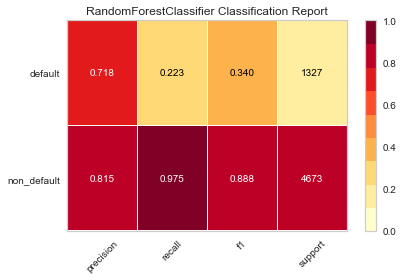

The time it takes to fit and predict for iteration 1  is 0.7836670875549316 recall is 0.19894498869630747 
The time it takes to fit and predict for iteration 2  is 0.806002140045166 recall is 0.19894498869630747 
The time it takes to fit and predict for iteration 3  is 0.758385181427002 recall is 0.21477015825169554 
The time it takes to fit and predict for iteration 4  is 0.8097317218780518 recall is 0.2373775433308214 
classification report for iteration 4 with improved recall 0.2373775433308214 


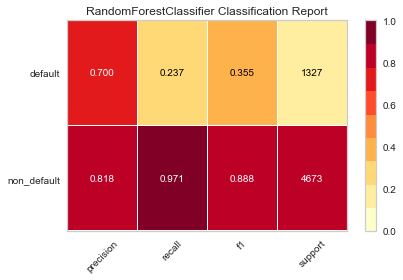

The time it takes to fit and predict for iteration 5  is 6.874881982803345 recall is 0.5825169555388093 
classification report for iteration 5 with improved recall 0.5825169555388093 


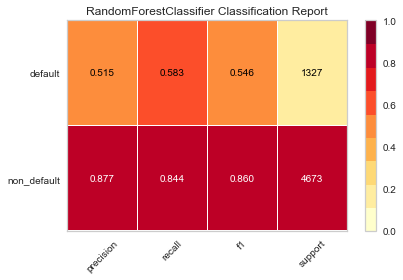

The time it takes to fit and predict for iteration 6  is 6.527785778045654 recall is 0.5742275810097965 
The time it takes to fit and predict for iteration 7  is 6.597923040390015 recall is 0.5674453654860587 
The time it takes to fit and predict for iteration 8  is 6.8895909786224365 recall is 0.5644310474755087 
The time it takes to fit and predict for iteration 9  is 6.9083569049835205 recall is 0.5802562170308968 
The time it takes to fit and predict for iteration 10  is 23.537925004959106 recall is 0.36473247927656366 
The time it takes to fit and predict for iteration 11  is 23.454038858413696 recall is 0.3677467972871138 
The time it takes to fit and predict for iteration 12  is 24.355221033096313 recall is 0.34815373021853807 
The time it takes to fit and predict for iteration 13  is 25.16293978691101 recall is 0.373775433308214 
The time it takes to fit and predict for iteration 14  is 23.793384790420532 recall is 0.37980406932931426 
The time it takes to fit and predict for i

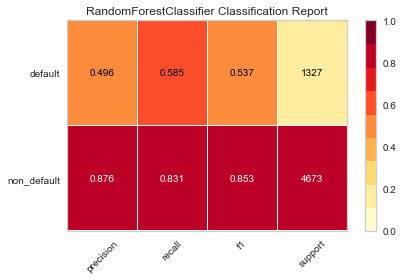

The time it takes to fit and predict for iteration 16  is 0.8704719543457031 recall is 0.5689525244913338 
The time it takes to fit and predict for iteration 17  is 0.784724235534668 recall is 0.5659382064807837 
The time it takes to fit and predict for iteration 18  is 0.7569692134857178 recall is 0.5546345139412208 
The time it takes to fit and predict for iteration 19  is 0.8391318321228027 recall is 0.5779954785229842 
The time it takes to fit and predict for iteration 20  is 6.944530010223389 recall is 0.3519216277317257 
The time it takes to fit and predict for iteration 21  is 6.76735520362854 recall is 0.3549359457422758 
The time it takes to fit and predict for iteration 22  is 6.925761699676514 recall is 0.33911077618688773 
The time it takes to fit and predict for iteration 23  is 6.728482007980347 recall is 0.3519216277317257 
The time it takes to fit and predict for iteration 24  is 6.657071113586426 recall is 0.3677467972871138 
The time it takes to fit and predict for it

In [72]:
## Random Forest classifiers models with different parameters 

iter_num=0
times_rec=[]
 
rf_max_acc = 0
rf_max_recal = 0
rf_trn_idx_max_acc = []
rf_tst_idx_max_acc  = []
rf_estimator_for_max = 0
rf_max_depth_max = 0
rf_class_weight_max = None

#for loop 
estimators = [100,   500, 1000]
max_depths = [2,5,10]
class_weights = [None , 'balanced']
for estimator , max_depth , class_weight in zip(estimators*len(max_depths)*len(class_weights) ,
             max_depths*len(class_weights)*len(estimators),
             class_weights*len(max_depths)*len(estimators)):
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices] 
        X_test = X[test_indices]
        y_test = y[test_indices]

         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestClassifier(n_estimators=estimator, max_depth=max_depth, class_weight= class_weight,
                                               random_state=0)

        random_forest.fit(X_train,y_train)  # train object
        y_hat = random_forest.predict(X_test) # get test set precitions

        t1=time()
        diff=np.array([t1-t0])

        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = mt.recall_score(y_test, y_hat)
        print ("The time it takes to fit and predict for iteration {}  is {} recall is {} ".format(iter_num, diff[0],
                                                                                                   rcl)) 

        #if acc > rf_max_acc :
        if rcl > rf_max_recal:
            #rf_max_acc = acc
            rf_max_recal = rcl
            rf_trn_idx_max_acc = train_indices
            rf_tst_idx_max_acc  = test_indices
            rf_estimator_for_max = estimator
            rf_max_depth_max = max_depth
            rf_class_weight_max = class_weight
            
            print ("classification report for iteration {} with improved recall {} ".format(iter_num, rcl))
            rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)
            rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            rf_cl_reporter.show()   


        iter_num+=1    

####  Decision Tree classifiers 

Decision Trees are used to classify model based on different split rules. like gini.
We are creating multiple models and choosing one based on max recall score for our further analysis

##### Advantages and Disadvantages 
One of the advantages of the Decision tree algorithm is that it traces all the paths from available features and data to arrive on a decision. We don't need to scale or normalize of features like some of the other algorithms.
However it might take more times to train a model and might not be very accurate to the future data which it has need seen in training set.


In [73]:
Image(url ='../images/decision_tree_tan.png')

The time it takes to fit and predict for iteration 0  is 0.28202104568481445 
classification report for iteration 0 


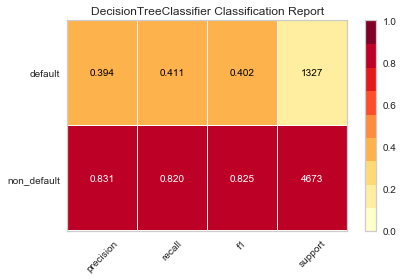

The time it takes to fit and predict for iteration 1  is 0.2609751224517822 
classification report for iteration 1 


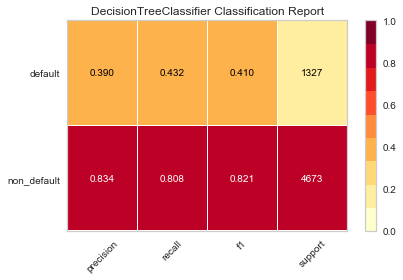

The time it takes to fit and predict for iteration 2  is 0.25335216522216797 
The time it takes to fit and predict for iteration 3  is 0.26089906692504883 
The time it takes to fit and predict for iteration 4  is 0.24901771545410156 
The time it takes to fit and predict for iteration 5  is 0.21587800979614258 
The time it takes to fit and predict for iteration 6  is 0.2285912036895752 
The time it takes to fit and predict for iteration 7  is 0.223923921585083 
The time it takes to fit and predict for iteration 8  is 0.22481799125671387 
The time it takes to fit and predict for iteration 9  is 0.22627902030944824 


In [74]:
## Decision tree classifiers 

iter_num=0
times_rec=[]
decision_tree_classifiers = dict()
random_forest_classifiers = dict()

class_weights = [None , 'balanced']
dt_max_acc = 0
dt_max_recall = 0
dt_trn_idx_max_acc =[]
dt_tst_idx_max_acc = []
dt_class_weight_for_max = []

for class_weight in class_weights:
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]

         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeClassifier(class_weight = class_weight)
        decision_tree.fit(X_train,y_train)  # train object
        y_hat = decision_tree.predict(X_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])

        print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy , recall and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = mt.recall_score(y_test, y_hat)

        #if acc> dt_max_acc:
        if rcl> dt_max_recall:
            #dt_max_acc = acc
            dt_max_recall = rcl
            dt_trn_idx_max_acc = train_indices
            dt_tst_idx_max_acc = test_indices
            dt_class_weight_for_max = class_weight
            conf = mt.confusion_matrix(y_test,y_hat)
            print ("classification report for iteration {} ".format(iter_num))

            dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)
            dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            dt_cl_reporter.show()  

       
        iter_num+=1
    

#### KNN 


#### KNN 

KNN is used to classify models by using the K nearest number of points based on a chosen distance metric.The most common class of the K nearest points is used to classify the point that is being predicted. The distance metric can be a variety of options, we have chosen cosine, euclidean and manhattan distance as our metrics. We are creating multiple models and choosing one based on max recall score for our further analysis


##### Advantages and Disadvantages 
An advantage of the KNN algorithm is its simplicity. KNN can be used on nearly any data set because it is relying on a simple distance metric to determine the classification of the point. Another advantage is the oppurtunity to fine tune multiple parameters to best fit the dataset. A change in K can be implemented easily to judge metrics, and the distance metric can also be a variety of options.

Some disadvantages of KNN also revolve around the distance metric. There is not set method to choosing a distance metric, so many options should be looked into. KNN is also a lazy learner, which can lead to costly computing since the model needs to look at every point in the dataset and determine the closest neighbors.

For k =  10 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



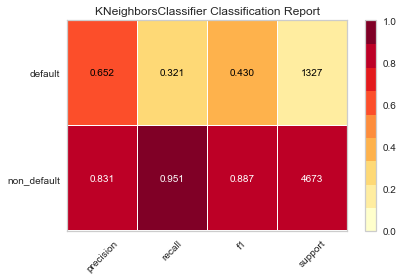

For k =  10 and metric =  euclidean :
For k =  10 and metric =  euclidean :
For k =  10 and metric =  euclidean :
For k =  10 and metric =  euclidean :
For k =  20 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



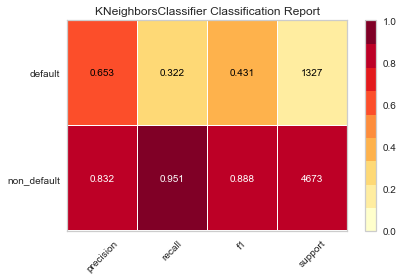

For k =  20 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.34      0.44      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



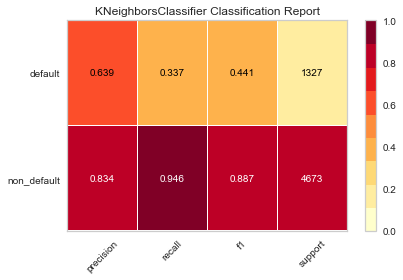

For k =  20 and metric =  euclidean :
For k =  20 and metric =  euclidean :
For k =  20 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



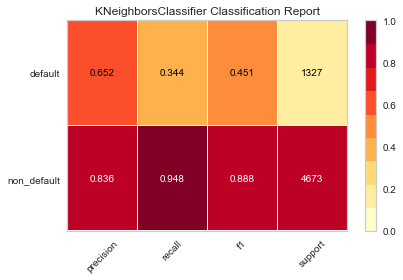

For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
For k =  20 and metric =  cosine :
For k =  20 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



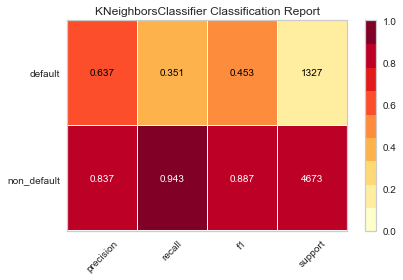

For k =  20 and metric =  cosine :
For k =  20 and metric =  cosine :
For k =  20 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



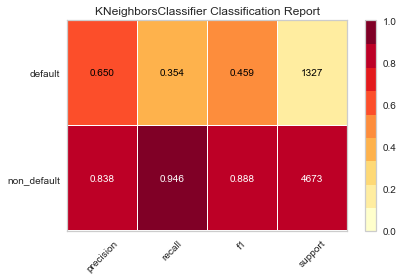

For k =  50 and metric =  cosine :
For k =  50 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.37      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



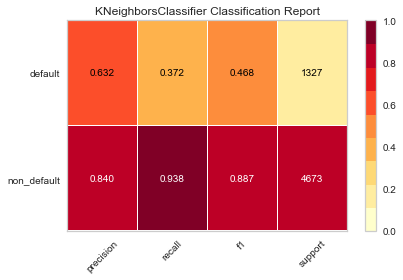

For k =  50 and metric =  cosine :
For k =  50 and metric =  cosine :
For k =  50 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  100 and metric =  manhattan :
For k =  100 and metric =  manhattan :
For k =  100 and metric =  manhattan :
For k =  100 and metric =  m

In [75]:
parameters = [10, 20, 50, 100]
metrics = ['euclidean', 'cosine', 'manhattan']
max_acc_knn = 0 
max_met =[]
max_k = 0
max_recall_knn=0
for met in metrics:
    for K in parameters:
        for train_indices, test_indices in cv_object.split(X,y): 
            X_train = X[train_indices]
            y_train = y[train_indices]
            X_test = X[test_indices]
            y_test = y[test_indices]   
            X_train_scaled = scl_obj.transform(X_train) # apply to training
            X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)
            print("For k = ", K, "and metric = ", met, ":")
            knn = KNeighborsClassifier(n_neighbors= K, weights='uniform', metric=met)
            knn.fit(X_train_scaled,y_train)
            y_hat = knn.predict(X_test_scaled)
            acc = mt.accuracy_score(y_test,y_hat)
            rcl = mt.recall_score(y_test, y_hat)
            conf = mt.confusion_matrix(y_test,y_hat)
            #print('accuracy:', acc )
            #print(conf)
            
        
            #if acc>max_acc_knn :
            if rcl>max_recall_knn :
                max_acc_knn = acc
                max_recall_knn = rcl
                max_met = met
                max_k = K
                knn_trn_idx_max_acc = train_indices
                knn_tst_idx_max_acc = test_indices
                ClassReport = mt.classification_report(y_test,y_hat)
                print(ClassReport)
                
                knn_cl_reporter = ClassificationReport(knn, classes=['non_default' , 'default'], support=True)
                knn_cl_reporter.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
                knn_cl_reporter.score(X_test_scaled, y_test)        # Evaluate the model on the test data
                knn_cl_reporter.show()  
             

    
print("Max accuracy is:", max_acc_knn)    

#### Random Forest Regession 

In Random forest regression decision trees are used to classify different segments of the dataset. This is useful in scenarios where data is not linearly related and there are arbiterary decision boundries around the dataset. 

In [76]:
## Random forest regression models with different parameters 

iter_num=0
times_rec=[]
 
rf_reg_max_score = 0
rf_reg_trn_idx_max_acc = []
rf_reg_tst_idx_max_acc  = []
rf_reg_estimator_for_max = 0
rf_reg_max_depth_max = 0

#for loop 
estimators = [100, 500, 1000]
max_depths = [2, 10]
for estimator , max_depth  in zip(estimators*len(max_depths),max_depths* len(estimators)):
    for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
        
         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, 
                                              random_state=0)
        random_forest.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = random_forest.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = random_forest.score(X_reg_test,y_reg_test)
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        if score > rf_reg_max_score :
            rf_reg_trn_idx_max_acc = train_index
            rf_reg_tst_idx_max_acc = test_index
            rf_reg_estimator_for_max = estimator
            rf_reg_max_depth_max = max_depth
            
        iter_num+=1
        
    

The time it takes to fit and predict for iteration 0 is 1.4774138927459717 score is 0.16360892980972486 
The time it takes to fit and predict for iteration 1 is 1.4533312320709229 score is 0.09137216065580522 
The time it takes to fit and predict for iteration 2 is 1.5016436576843262 score is -0.044368448598679056 
The time it takes to fit and predict for iteration 3 is 1.4476828575134277 score is -0.23572244690454916 
The time it takes to fit and predict for iteration 4 is 1.4457998275756836 score is 0.026385366168372722 
The time it takes to fit and predict for iteration 5 is 32.27946400642395 score is 0.25540045508964815 
The time it takes to fit and predict for iteration 6 is 32.11836814880371 score is 0.23194902305575082 
The time it takes to fit and predict for iteration 7 is 32.48042917251587 score is 0.07493438381740214 
The time it takes to fit and predict for iteration 8 is 32.26276898384094 score is -0.14625755356806347 
The time it takes to fit and predict for iteration 9 i

####  Decision Tree Regession 

Decision tree regression is used to regress using a sine curve. Some additional noisy points are used to fit the local linear regression approximations.
if max depth parameter is too high it may end up overfitting the model for noise.

In [77]:
iter_num=0
times_rec=[]
 
dt_reg_max_acc = 0
dt_reg_trn_idx_max_acc = []
dt_reg_tst_idx_max_acc  = []
dt_reg_max_depth_max = 0

#for loop 
estimators = [100,  1000]
max_depths = [2,10]
for   max_depth  in max_depths:
    for test_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeRegressor(max_depth=max_depth, 
                                              random_state=0)
        decision_tree.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = decision_tree.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = decision_tree.score(X_reg_test,y_reg_test)
        
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        
        if dt_reg_max_acc> score:
            dt_reg_trn_idx_max_acc = train_index
            dt_reg_tst_idx_max_acc = test_index
            dt_reg_max_depth_max = max_depth
        iter_num+=1

The time it takes to fit and predict for iteration 0 is 0.02790975570678711 score is 0.3096141380079973 
The time it takes to fit and predict for iteration 1 is 0.026755094528198242 score is 0.08268366269192973 
The time it takes to fit and predict for iteration 2 is 0.02703094482421875 score is 0.0721189294715161 
The time it takes to fit and predict for iteration 3 is 0.0273129940032959 score is 0.07014883678137007 
The time it takes to fit and predict for iteration 4 is 0.027365922927856445 score is -0.4461196476543723 
The time it takes to fit and predict for iteration 5 is 0.1303417682647705 score is 0.6168875160335299 
The time it takes to fit and predict for iteration 6 is 0.128953218460083 score is 0.23556266502573686 
The time it takes to fit and predict for iteration 7 is 0.12727785110473633 score is 0.2878067166408218 
The time it takes to fit and predict for iteration 8 is 0.10931181907653809 score is 0.023151277835449235 
The time it takes to fit and predict for iteration 

#### KNN Regession 

In [78]:
iter_num=0
times_rec=[]
 
max_acc_knn_reg = 0 
max_met_reg =[]
max_k_reg = 0
max_recall_knn_reg=0
knn_trn_idx_max_acc_reg = []
knn_tst_idx_max_acc_reg = []

#for loop 
parameters = [10, 20, 50, 100]
metrices = ['euclidean', 'cosine', 'manhattan']
for met in metrices:
    for K in parameters:
        for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
            X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
            y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]

         #we count the time in executing the logistic regression
            t0 = time()
            knn = KNeighborsRegressor(n_neighbors= K, weights='uniform', metric=met)
            knn.fit(X_reg_train,y_reg_train)  # train object
            y_reg_hat = knn.predict(X_reg_test) # get test set precitions
            t1=time()
            diff=np.array([t1-t0])
            times_rec=np.append(times_rec,diff)
            # now let's get the accuracy and confusion matrix for this iterations of training/testing
            score = knn.score(X_reg_test,y_reg_test)
        
            print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        
            if  score> max_acc_knn_reg:
                
                max_acc_knn_reg = score
                #max_recall_reg = rcl
                max_met_reg = met
                max_k_reg = K
                knn_trn_idx_max_acc_reg = train_index
                knn_tst_idx_max_acc_reg = test_index
            iter_num+=1

The time it takes to fit and predict for iteration 0 is 0.3570060729980469 score is 0.06139914215878962 
The time it takes to fit and predict for iteration 1 is 0.318220853805542 score is 0.05642076616098701 
The time it takes to fit and predict for iteration 2 is 0.3622870445251465 score is 0.03146466720426222 
The time it takes to fit and predict for iteration 3 is 0.31769490242004395 score is 0.0238275340551648 
The time it takes to fit and predict for iteration 4 is 0.30610013008117676 score is 0.047023057253573364 
The time it takes to fit and predict for iteration 5 is 0.4924502372741699 score is 0.08424724841682618 
The time it takes to fit and predict for iteration 6 is 0.461245059967041 score is 0.09639369833560585 
The time it takes to fit and predict for iteration 7 is 0.3740859031677246 score is 0.09252801668497956 
The time it takes to fit and predict for iteration 8 is 0.37018918991088867 score is 0.07995255440257487 
The time it takes to fit and predict for iteration 9 i

## Modeling and Evaluation 4

Analysis of the performance of the model is done based on different crieteria. Since our classificalation classes are unbalanced and number of defaults are much less than number of non defaults and our obective is to get most of the default cases which is of rarer nature , recall is more important crieteria.
For classification task we have created precision recall curve , confusion matrix, classification report and ROAAUC plot for the best performing model. 
For Regression tasks we have created Residual plot and Prediction error plots. 

## Classification Tasks 

#### Random Forest 
Random Forest gives 
Analysis of Random forst with the best estimate 

running model for max accuracy 0
parameters for the model with best accuracy is num_estimators 100 , max_depth 2 and class_weight
The time it takes to fit and predict for iteration 60  is 0.8047950267791748 
classification report for iteration 60 


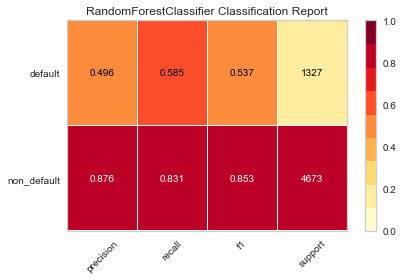

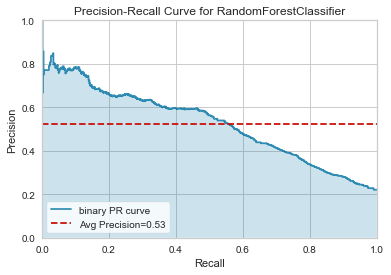

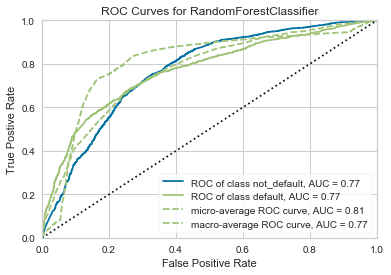

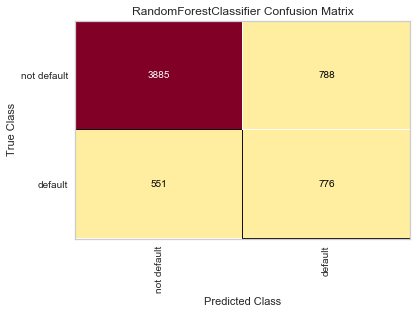

In [79]:
t0 = time()


X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]

print ('running model for max accuracy {}'.format(rf_max_acc))
print('parameters for the model with best accuracy is num_estimators {} , max_depth {} and class_weight'.format(
    rf_estimator_for_max, rf_max_depth_max,  rf_class_weight_max))

random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)


random_forest.fit(X_train,y_train)  # train object
y_hat = random_forest.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])

print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)


# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))

rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)

rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
rf_cl_reporter.show()   

pr_curve = PrecisionRecallCurve(random_forest)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()


roc_curve = ROCAUC(random_forest, classes=["not_default", "default"])
roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 


cm = ConfusionMatrix(random_forest, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

#### Precision Recall Curve 

Lookng at the Precison recall curve in above we can see that as the increase threshold for predicting default the recall value increases but the precision decreases. Since there are close to 22% cases that are default and our objective is to find more and more default cases we want to keep our thresold to appropriate limit. From above precision recall curve it turns out that we set our thresold of 50% then we can achieve a recall of 50%

#### ROC AUC 
Area under curve for Random forest classification model is 0.77 which indicates it to be a good model. 

#### Classification Report 

classification report for this model is shoes F1 score apart from precision and recall.F1 score for Random forest model is 0.53. F1 score combines precision and recall parameters to give one common indicator. It is harmonic mean of precision and recall so this value is always between those two.

#### Confusion matrix 
We can calculate other Parameters using precison , recall , specifity , true positive rate , false positive rate etc. using Confusion matrix. In case of our best Random forest model based on recall score We correctly predicted 776 out of 1337 defaults cases.

#### Decision Tree  

Following are the analysis results for the best decision tree model based on the recall value


Running model for max decision tree accuracy model 0
Parameters for decision tree for max accuracy class_weight None
The time it takes to fit and predict for iteration 60  is 0.2642822265625 
accurancy for balanced class is 0.7275
classification report for iteration 60 


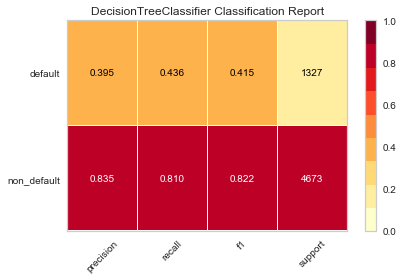

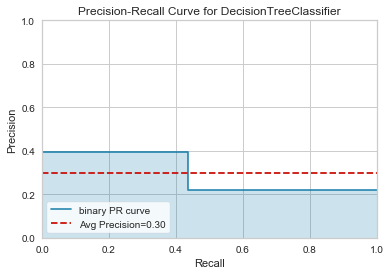

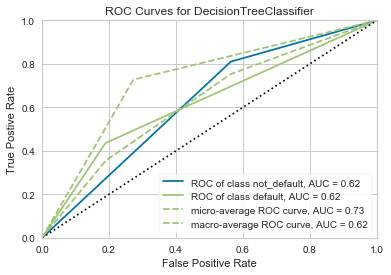

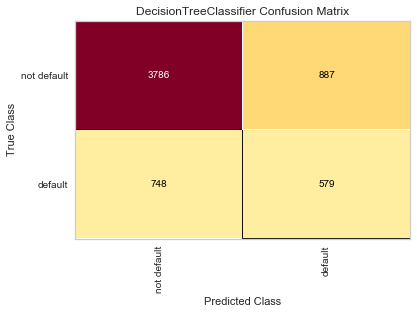

In [80]:
t0 = time()

print('Running model for max decision tree accuracy model {}'.format(dt_max_acc  ))
 
print('Parameters for decision tree for max accuracy class_weight {}'.format(dt_class_weight_for_max  ))


X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)

decision_tree.fit(X_train,y_train)  # train object
y_hat = decision_tree.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])
print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)
# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print("accurancy for balanced class is {}".format(acc))
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))
dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)

dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
dt_cl_reporter.show()  

pr_curve = PrecisionRecallCurve(decision_tree)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()

roc_curve = ROCAUC(decision_tree, classes=["not_default", "default"])

roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 

cm = ConfusionMatrix(decision_tree, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

iter_num+=1

#### Precision Recall Curve 

Precision Recall curve for decision Tree. Shows that the best estimate for recall and precision is constant till the thresold of 0.4 and drops after that. Based on Precison and recall curve we can say that Random forest is the better model than the decision tree for this classification

#### ROC AUC 
Area under curve for Random forest classification model is 0.62 which indicates it to be a slightly better than random prediction model sonce area under curve is only slghtly greater than 0.5. 

#### Classification Report 

classification report for this model is shoes F1 score apart from precision and recall.F1 score for Random forest model is 0.39 which is worse than that for random forest model. F1 score combines precision and recall parameters to give one common indicator. It is harmonic mean of precision and recall so this value is always between those two.

#### Confusion matrix 
We can calculate other Parameters using precison , recall , specifity , true positive rate , false positive rate etc. using Confusion matrix. In case of our best Random forest model based on recall score We correctly predicted 563 out of 1327 defaults cases.

####  KNN 

Running model for max KNN accuracy model 0.8131666666666667
Parameters for KNN for max accuracy metric = cosine K=  
The time it takes to fit and predict for iteration 61  is 3.246798038482666 
accurancy for balanced class is 0.7335
classification report for iteration 61 


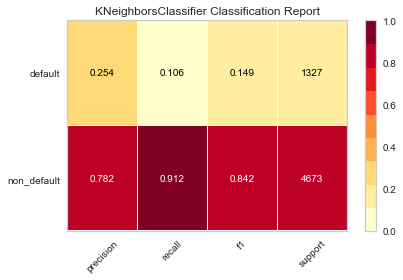

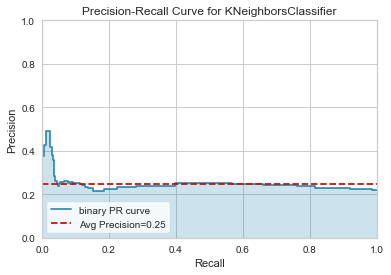

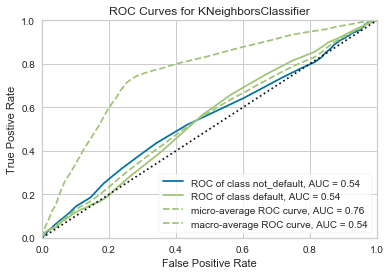

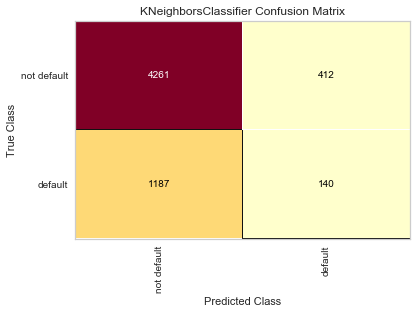

In [81]:
 
t0 = time()

print('Running model for max KNN accuracy model {}'.format(max_acc_knn  )) 
print('Parameters for KNN for max accuracy metric = {} K=  '.format(max_met , max_k ))


X_train, X_test = X[knn_trn_idx_max_acc], X[knn_tst_idx_max_acc]
y_train, y_test = y[knn_trn_idx_max_acc], y[knn_tst_idx_max_acc]
     
    
knn = KNeighborsClassifier(n_neighbors= max_k, weights='uniform', metric=max_met)
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


t1=time()
diff=np.array([t1-t0])
print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)
# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print("accurancy for balanced class is {}".format(acc))
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))
knn_cl_reporter = ClassificationReport(knn, classes=['non_default' , 'default'], support=True)

knn_cl_reporter.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
knn_cl_reporter.score(X_test_scaled, y_test)        # Evaluate the model on the test data
knn_cl_reporter.show()  

pr_curve = PrecisionRecallCurve(knn)
pr_curve.fit(X_train_scaled, y_train)
pr_curve.score(X_test_scaled, y_test)
pr_curve.show()

roc_curve = ROCAUC(knn, classes=["not_default", "default"])

roc_curve.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test_scaled, y_test)        # Evaluate the model on the test data
roc_curve.show() 

cm = ConfusionMatrix(knn, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
# How did we do?
cm.show()

iter_num+=1

# Need to fix this to match KNN

#### Precision Recall Curve 

Precision Recall curve for decision Tree. Shows that the best estimate for recall and precision is constant till the thresold of 0.4 and drops after that. Based on Precison and recall curve we can say that Random forest is the better model than the decision tree for this classification

#### ROC AUC 
Area under curve for Random forest classification model is 0.62 which indicates it to be a slightly better than random prediction model sonce area under curve is only slghtly greater than 0.5. 

#### Classification Report 

classification report for this model is shoes F1 score apart from precision and recall.F1 score for Random forest model is 0.39 which is worse than that for random forest model. F1 score combines precision and recall parameters to give one common indicator. It is harmonic mean of precision and recall so this value is always between those two.

#### Confusion matrix 
We can calculate other Parameters using precison , recall , specifity , true positive rate , false positive rate etc. using Confusion matrix. In case of our best Random forest model based on recall score We correctly predicted 563 out of 1327 defaults cases.

### Regression Tasks 

We evaluated our Regression models based on the residual and Prediction errors for the model.

#### Random Forest Regression 



running model for max score 0
parameters for the model with best accuracy is num_estimators 1000 , max_depth 10


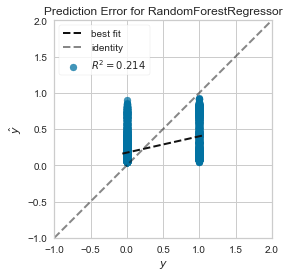

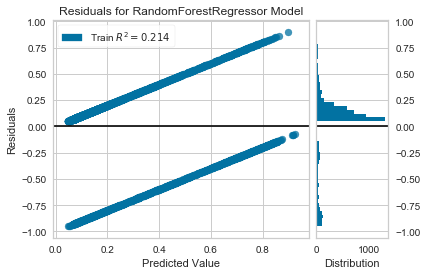

In [82]:
t0 = time()

X_train, X_test = X[rf_reg_trn_idx_max_acc], X[rf_reg_tst_idx_max_acc]
y_train, y_test = y[rf_reg_trn_idx_max_acc], y[rf_reg_tst_idx_max_acc]

print ('running model for max score {}'.format(rf_reg_max_score))
print('parameters for the model with best accuracy is num_estimators {} , max_depth {}'.format(
    rf_reg_estimator_for_max, rf_reg_max_depth_max))

random_forest = RandomForestRegressor(n_estimators=rf_reg_estimator_for_max, max_depth=rf_reg_max_depth_max, 
                                              random_state=0)


rf_pred_error = PredictionError(random_forest)

rf_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
rf_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
rf_pred_error.show() 

res_plt = ResidualsPlot(random_forest)
res_plt.fit(X_test, y_test)
res_plt.show()

Based omn R squared value it looks the Random forest model is not the best for prediction of PAY_amount value. it looks line there is some linear relation in payment values which 

#### Decision Tree 

running model for max score 0
parameters for the model with best accuracy is   max_depth 10


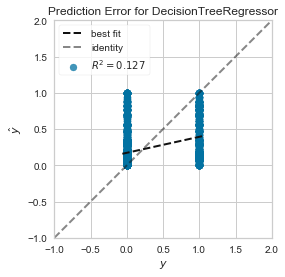

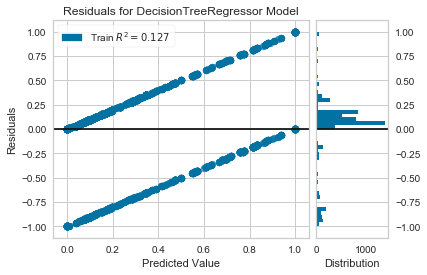

In [83]:
t0 = time()
 
X_train, X_test = X[dt_reg_trn_idx_max_acc], X[dt_reg_tst_idx_max_acc]
y_train, y_test = y[dt_reg_trn_idx_max_acc], y[dt_reg_tst_idx_max_acc]

print ('running model for max score {}'.format(dt_reg_max_acc))
print('parameters for the model with best accuracy is   max_depth {}'.format( dt_reg_max_depth_max))

decision_tree = DecisionTreeRegressor(max_depth=dt_reg_max_depth_max, 
                                              random_state=0)

rf_pred_error = PredictionError(decision_tree)

rf_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
rf_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
rf_pred_error.show() 

res_plt = ResidualsPlot(decision_tree)
res_plt.fit(X_test, y_test)
res_plt.show()

R squared value for decision tree model is even lower than that for random forest model. This indicates that even decision tree model is not the best model for the regression task. We might analyse and use other model for better prediction of these values.

#### KNN

parameters for the model with best accuracy is met euclidean , K 100


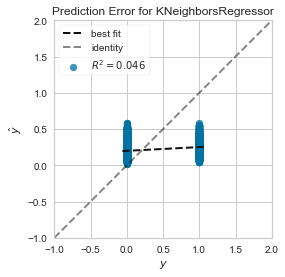

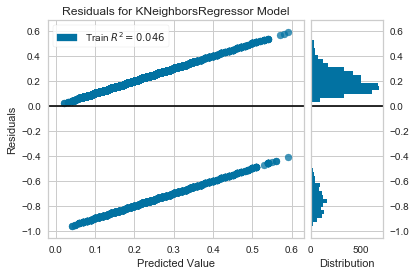

In [84]:
t0 = time()
 

X_train, X_test = X[knn_trn_idx_max_acc_reg], X[knn_tst_idx_max_acc_reg]
y_train, y_test = y[knn_trn_idx_max_acc_reg], y[knn_tst_idx_max_acc_reg]
 
#print ('running model for max score {}'.format(knn_reg_max_score))
print('parameters for the model with best accuracy is met {} , K {}'.format(
    max_met_reg, max_k_reg))

### fix this 
knn = KNeighborsRegressor(n_neighbors= max_k_reg, weights='uniform', metric=max_met_reg)

knn_pred_error = PredictionError(knn)

knn_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
knn_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
knn_pred_error.show() 

res_plt = ResidualsPlot(knn)
res_plt.fit(X_test, y_test)
res_plt.show()

## Modeling and Evaluation 5

Following is a Comparison of Decision Tree and Random forest classifiers with same date. We are using error estimates to compare two models. The error estimates should follow Gaussian distribution. We calculate mean and standard error using the formula discussed in the class. 
<TODO add image and formula >
    We are caclulating confidence interval for error differences to figure out if the differences are significant
  We can add similar test for knn , decision tree and knn and random forest comparison 


### Decision Tree and Random Forest Comparision based on error rate 

Our model comparison is based on following formula. 
We compare d bar by taking averedge  of the differences of the error rates of the models in different folds using same training set data.
The crieteria for model comparison is difference in error rates of the models which turns out to be same as difference between accuracies of the models. 
The Null hypothesis is that all choosen models have same accuracy.
We have choosen parameters for best performing models from different classes for the comparison. These models are run multiple times based on cross validation split and corresponding accuracies from each fold are compared.

In [85]:
Image(url ='../images/model_comparison.png')

In [86]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)
    decision_tree.fit(X_train,y_train) # train object
    
    random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
    random_forest.fit(X_train,y_train) 
    
    y_hat_dt = decision_tree.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_dt = mt.accuracy_score(y_test,y_hat_dt)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_dt - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[-0.04500000000000004, -0.03633333333333333, -0.04833333333333334, -0.05133333333333334, -0.052166666666666694]
-0.046633333333333346
-3.469446951953614e-18
(-1.4348558859322327, 1.341589219265566)


As we can see above tht zero is a possible value for 95% confidence interval it means that we can't reject the null hypothesis that both the models have no difference in their error rate with 95% confidence.

###  KNN  and Random Forest Comparision based on error rate 

In [87]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    knn = KNeighborsClassifier(n_neighbors= max_k, weights='uniform', metric=max_met)

    random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
    knn.fit(X_train,y_train) # train object

    random_forest.fit(X_train,y_train) 
    
    y_hat_knn = knn.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_knn = mt.accuracy_score(y_test,y_hat_knn)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_knn - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[0.005333333333333301, 0.01883333333333337, 0.010833333333333361, 0.012333333333333307, 0.006833333333333358]
0.010833333333333339
4.336808689942018e-19
(-1.3773892192655661, 1.3990558859322326)


As we can see above tht zero is a possible value for 95% confidence interval it means that we can't reject the null hypothesis that both the models have no difference in their error rate with 95% confidence.

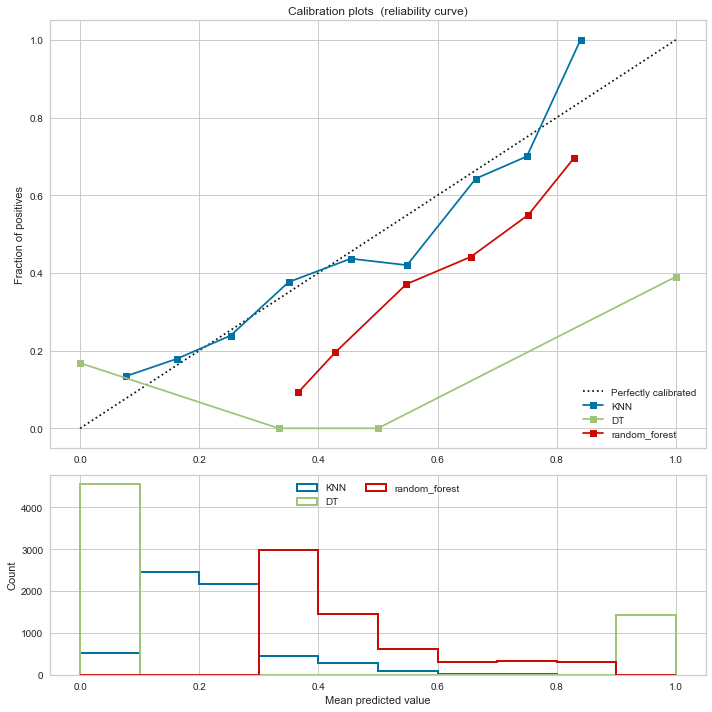

In [88]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(knn, 'KNN'),
                  (decision_tree, 'DT'),
                  (random_forest, 'random_forest')
                  ]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

## Modeling and Evaluation 6

We 'll be checking feature importance for our best performing model in this section. 

### Random Forest 

Feature importance for best performing  random forest model

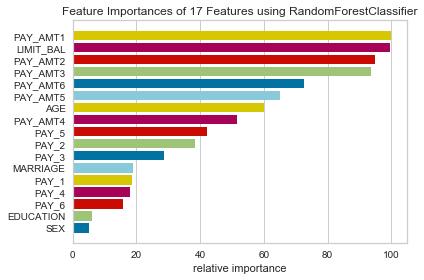

In [89]:
iter_num=0
times_rec=[]

X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]
 #we count the time in executing the logistic regression
t0 = time()
random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
viz = FeatureImportances(random_forest, labels = cc.columns)
viz.fit(X_train_scaled,y_train)
viz.show()

As We can see from the above graph the most important features for determining whether a person will default or not are PAY_AMT's and Limit balance. We can interpret from this model that the possibility of a person getting detault is based on his his payment of past dues more specifically the most recent one. The Most recent payment pattern is one of the major factor to determine whether a person is going to default in next month or not.
The model also underlines some less important features like education , marriage and sex which don't seem to be that important in a person a chances of getting default next month. 
The model conclusion are aligned with common sense reasoning that a person in financial crisis is more likely to reflect that effect in his current and most recent financial transactions and the financial behavior are less of a factor of sex , marital status or education

### Decision Tree 

Feature importance for best performing  random forest model

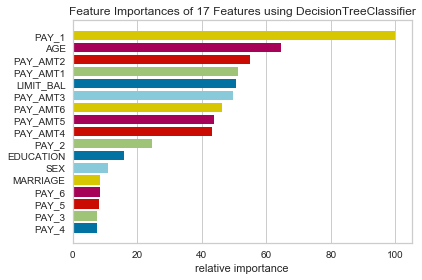

In [90]:
iter_num=0
times_rec=[]
X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)
    
 #we count the time in executing the logistic regression
t0 = time()
random_forest = DecisionTreeClassifier()
viz = FeatureImportances(decision_tree, labels = cc.columns)
viz.fit(X_train,y_train)
viz.show()

Relative of features as per the Decision Tree are almost same as that of Random forest. One distict feature of this model is that it gives more emphasis on PAY_1 attribute. which is the current payment status of a customer. The effect of this attibute averages out in case of Random forest model as that one relies on multiple decision trees and all of them this attirbute might not even be selected.
The reasoning of a person getting defauled based on his current history is supported by decision tree model as well.
This model also support the conclusion of Rendon forest model related to less important features of a person getting default. Sex, ,arital status and education are relatively less important. 

### KNN 

In case of knn there is no output for feature importance. We run into following error when we attempt to draw graph in same way in which we did for decision tree and random forest. 
In case of KNN we use particular metric to determine proximity of nodes and cluster them accordingly. The distance is measured based on the difference between corresponding features.

In [91]:
iter_num=0
times_rec=[]
 

for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices] 
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the logistic regression
    t0 = time()
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
    #viz = FeatureImportances(knn, labels = cc.columns)
    #viz.fit(X_train_scaled,y_train)
    #viz.show()

### References 
    * Introduction To Data Mining by Tan, Steinbach, and Kumar First Edition, ISBN-10: 0321321367
    * Async Lectures from SMU ML 7331 course 